# Project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd

%matplotlib inline

In [3]:
DATA_PATH = 'data'

In [4]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK&STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'cLIMB_STAIRS&TALK_TO_WALK&TALK', 

}

## Import dataset

In [5]:
def normalize_data(dataset):
    data = dataset.copy()
    data = minmax_scale(data, axis=0)
    return pd.DataFrame(data=data, columns=dataset.columns)

In [6]:
def append_arrays(data_array):
    data = data_array[0]
    for i in range(1, len(data_array)):
        data = np.concatenate((data, data_array[i]), axis=0)
    return data

In [7]:
def get_user_data(user_id=None, user_path=None):
    """
    reads user data from all files and appends it to just one

    """
    if user_path is None:
        folder_path = f'part{user_id}'
        path = os.path.join(DATA_PATH, folder_path)
    else:
        path = os.path.join(DATA_PATH, user_path)
    files_names = os.listdir(path)
    data_array = []
    for i in range(1, len(files_names)):
        if files_names[i].startswith('part'):
            data_path = os.path.join(path, files_names[i])
            aux = np.genfromtxt(data_path, delimiter=',')
            data_array += [aux]
            print(files_names[i], aux.shape)
    data = append_arrays(data_array)
    return data

In [8]:
data_user_0 = get_user_data(user_id=0)

part0dev1.csv (53120, 12)
part0dev2.csv (52864, 12)
part0dev3.csv (53120, 12)
part0dev4.csv (53120, 12)
part0dev5.csv (53120, 12)


In [9]:
data_user_0.shape

(265344, 12)

In [10]:
def get_all_data():
    users_list = os.listdir(DATA_PATH)
    data_array = []
    for user_path in users_list:
        if user_path.startswith('part'):
            data_array += [get_user_data(user_path=user_path)]

    data = append_arrays(data_array)
    return data

In [11]:
# dataset = get_all_data()

In [12]:
#dataset.shape
for i in range(1, 17):
    activity1 = data_user_0[data_user_0[:, 11] == i]
    print(i, activity1.shape)

1 (54676, 12)
2 (28800, 12)
3 (28928, 12)
4 (45066, 12)
5 (47754, 12)
6 (31365, 12)
7 (14725, 12)
8 (1920, 12)
9 (1920, 12)
10 (1792, 12)
11 (2048, 12)
12 (1270, 12)
13 (2540, 12)
14 (1270, 12)
15 (635, 12)
16 (635, 12)


## Explore data

In [13]:
# convert numpy array to pandas to analyse more easily

def to_pandas_dataframe(dataset):
    columns = ['device_id', 
        'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
        'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
        'magnetometer_x', 'magnetometer_y', 'magnetometer_z',
        'timestamp', 'activity'
    ]

    data = pd.DataFrame(data=dataset, columns=columns)
    data['device_id'] = data['device_id'].astype('int64')
    data['activity'] = data['activity'].astype('int64')
    return data

In [14]:
data = to_pandas_dataframe(data_user_0)

In [15]:
data_save_path = os.path.join(DATA_PATH, 'data_user_0.csv')

In [16]:
data.to_csv(data_save_path)

In [17]:
data = pd.read_csv(data_save_path)

In [18]:
data.dtypes

Unnamed: 0           int64
device_id            int64
accelerometer_x    float64
accelerometer_y    float64
accelerometer_z    float64
gyroscope_x        float64
gyroscope_y        float64
gyroscope_z        float64
magnetometer_x     float64
magnetometer_y     float64
magnetometer_z     float64
timestamp          float64
activity             int64
dtype: object

In [19]:
data.describe()

Unnamed: 0      device_id  accelerometer_x  accelerometer_y  \
count  265344.000000  265344.000000    265344.000000    265344.000000   
mean   132671.500000       3.000965         0.107497         8.509903   
std     76598.359251       1.414557         2.408684         3.106417   
min         0.000000       1.000000       -24.622000       -14.622000   
25%     66335.750000       2.000000        -1.347500         8.198100   
50%    132671.500000       3.000000        -0.232695         9.302200   
75%    199007.250000       4.000000         1.708000         9.783000   
max    265343.000000       5.000000        25.381000        24.996000   

       accelerometer_z    gyroscope_x    gyroscope_y    gyroscope_z  \
count    265344.000000  265344.000000  265344.000000  265344.000000   
mean          2.469700      -0.057952       0.380503       0.026642   
std           3.679298      37.547881      47.779915      41.575892   
min         -23.241000    -267.800000    -505.220000    -324.460000   
25%          -0.367673      -4.022525      -6.055725      -1.984150   
50%           2.409450      -0.065761      -0.206020      -0.002328   
75%           3.748300       5.822025       3.975575       3.419400   
max          24.585000     315.170000     502.200000     474.160000   

       magnetometer_x  magnetometer_y  magnetometer_z     timestamp  \
count   265344.000000   265344.000000    265344.00000  2.653440e+05   
mean        -0.082464        0.477239         0.43086  5.194220e+05   
std          0.473925        0.453306         0.67466  2.995185e+05   
min         -1.452500       -0.681430        -1.40000  6.362900e+01   
25%         -0.441530        0.263392        -0.18931  2.600475e+05   
50%         -0.103240        0.576310         0.52561  5.192850e+05   
75%          0.262100        0.818360         0.95281  7.786725e+05   
max          1.439800        1.523800         1.89910  1.039400e+06   

            activity  
count  265344.000000  
mean        4.025612  
std         2.581042  
min         1.000000  
25%         2.000000  
50%         4.000000  
75%         5.000000  
max        16.000000

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265344 entries, 0 to 265343
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       265344 non-null  int64  
 1   device_id        265344 non-null  int64  
 2   accelerometer_x  265344 non-null  float64
 3   accelerometer_y  265344 non-null  float64
 4   accelerometer_z  265344 non-null  float64
 5   gyroscope_x      265344 non-null  float64
 6   gyroscope_y      265344 non-null  float64
 7   gyroscope_z      265344 non-null  float64
 8   magnetometer_x   265344 non-null  float64
 9   magnetometer_y   265344 non-null  float64
 10  magnetometer_z   265344 non-null  float64
 11  timestamp        265344 non-null  float64
 12  activity         265344 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 26.3 MB


In [21]:
data.count()

Unnamed: 0         265344
device_id          265344
accelerometer_x    265344
accelerometer_y    265344
accelerometer_z    265344
gyroscope_x        265344
gyroscope_y        265344
gyroscope_z        265344
magnetometer_x     265344
magnetometer_y     265344
magnetometer_z     265344
timestamp          265344
activity           265344
dtype: int64

In [22]:
data.columns

Index(['Unnamed: 0', 'device_id', 'accelerometer_x', 'accelerometer_y',
       'accelerometer_z', 'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
       'magnetometer_x', 'magnetometer_y', 'magnetometer_z', 'timestamp',
       'activity'],
      dtype='object')

In [23]:
def append_metrics(dataset):
    data = dataset.copy()
    data['accelerometer_module'] = np.sqrt(data['accelerometer_x']**2 + data['accelerometer_y']**2 + data['accelerometer_z']**2)
    data['gyroscope_module'] = np.sqrt(data['gyroscope_x']**2 + data['gyroscope_y']**2 + data['gyroscope_z']**2)
    data['magnetometer_module'] = np.sqrt(data['magnetometer_x']**2 + data['magnetometer_y']**2 + data['magnetometer_z']**2)
    return data

In [24]:
data_with_features = append_metrics(data)

### Boxplot of the vector modules grouped by activity

In [25]:
def boxplot_features(data, var=0, title=None):
    """
    :param var: different activities; values:  0 = accelerometer_module, 1 = gyroscope_module, 2=magnetometer_module
    """
    variables = {0: 'accelerometer_module', 1: 'gyroscope_module', 2: 'magnetometer_module'} 
    plt.figure(figsize=(21, 10))
    data.boxplot(column=[variables[var]], by='activity')
    plt.title(variables[var])
    plt.show()

<Figure size 2100x1000 with 0 Axes>

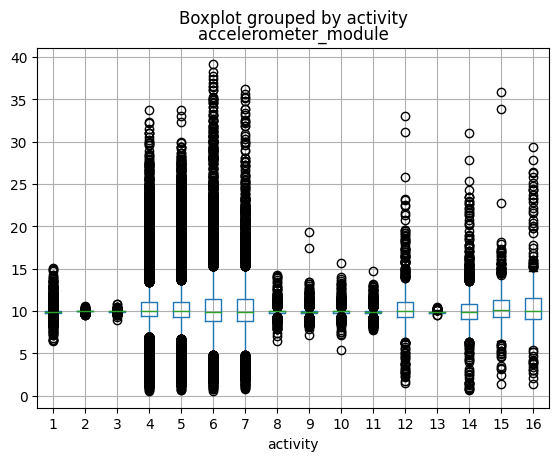

In [26]:
boxplot_features(data_with_features, 0)

### Plotting boxplot of the modules by activity separated by devices

![Boxplot core](./data/images/boxplot.png "Boxplot - detect outliers")

In [27]:
devices_id = data_with_features['device_id'].unique() # get all the different devices available

In [28]:
# ! desnecessario
# plots the information for each device

""" 
for device in devices_id:
    device_data = data_with_features.loc[data_with_features['device_id'] == device]
    boxplot_features(device_data, title=f'DEVICE: {device}')
"""

" \nfor device in devices_id:\n    device_data = data_with_features.loc[data_with_features['device_id'] == device]\n    boxplot_features(device_data, title=f'DEVICE: {device}')\n"

### Plot of the right wrist (id = 2)

In [29]:
right_wrist_id = 2
right_wrist_data = data_with_features[data_with_features['device_id'] == right_wrist_id][['accelerometer_module', 'gyroscope_module', 'magnetometer_module', 'activity']]

In [30]:
right_wrist_features = right_wrist_data[['accelerometer_module','gyroscope_module', 'magnetometer_module']]

<Figure size 2100x1000 with 0 Axes>

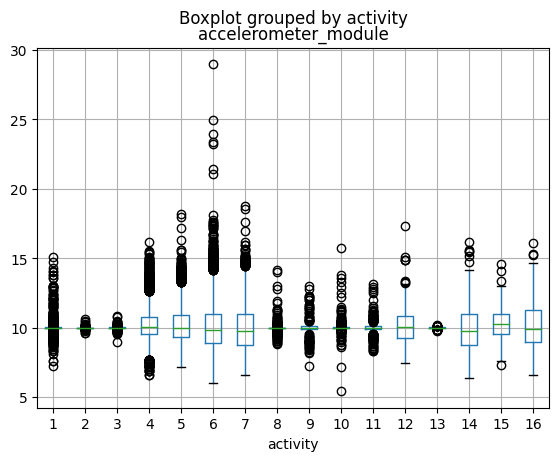

In [31]:
boxplot_features(right_wrist_data, title='Right wrist')

In [32]:
right_wrist_data.describe()

accelerometer_module  gyroscope_module  magnetometer_module  \
count          52864.000000      52864.000000         52864.000000   
mean              10.111320         38.729835             1.476594   
std                1.066517         44.666545             0.229939   
min                5.424999          0.015259             0.901666   
25%                9.865237          1.274141             1.305570   
50%               10.002429         20.214120             1.499769   
75%               10.130922         69.784923             1.673832   
max               28.986407        740.443292             2.353209   

           activity  
count  52864.000000  
mean       4.022321  
std        2.586555  
min        1.000000  
25%        2.000000  
50%        4.000000  
75%        5.000000  
max       16.000000

### Outliers density

In [33]:
def calculate_density(data, activity=None):
    first_quatile_accelerometer = data['accelerometer_module'].quantile(0.25)
    third_quantile_accelerometer = data['accelerometer_module'].quantile(0.75)
    first_quatile_gyroscope = data['gyroscope_module'].quantile(0.25)
    third_quantile_gyroscope = data['gyroscope_module'].quantile(0.75)
    first_quatile_magnetometer = data['magnetometer_module'].quantile(0.25)
    third_quantile_magnetometer = data['magnetometer_module'].quantile(0.75)

    accelerometer_median = data['accelerometer_module'].median()
    gyroscope_median = data['gyroscope_module'].median()
    magnetometer_median = data['magnetometer_module'].median()


    accelerometer_outliers = data[data['accelerometer_module'] < (first_quatile_accelerometer - 1.5*accelerometer_median)]['accelerometer_module'].count() + data[data['accelerometer_module'] > (third_quantile_accelerometer + 1.5*accelerometer_median)]['accelerometer_module'].count()
    gyroscope_outliers = data[data['gyroscope_module'] < (first_quatile_gyroscope - 1.5*gyroscope_median)]['gyroscope_module'].count() + data[data['gyroscope_module'] > (third_quantile_gyroscope + 1.5*gyroscope_median)]['gyroscope_module'].count()
    magnetometer_outliers = data[data['magnetometer_module'] < (first_quatile_magnetometer - 1.5*magnetometer_median)]['magnetometer_module'].count() + data[data['magnetometer_module'] > (third_quantile_magnetometer + 1.5* magnetometer_median)]['magnetometer_module'].count()

    data_size = data['magnetometer_module'].count()

    accelerometer_density = accelerometer_outliers / data_size
    gyroscope_density = gyroscope_outliers / data_size
    magnetometer_outliers = gyroscope_outliers / data_size
    print(f'{activity} Accelometer density: {accelerometer_density}') 
    print(f'{activity} Gyroscope density: {gyroscope_density}') 
    print(f'{activity} Magnometer density: {accelerometer_density}') 


In [34]:
def calculate_density_by_activity(data):
    activities = data['activity'].unique()
    for activity in activities:
        activity_data = data[data['activity'] == activity]
        calculate_density(activity_data, activity=activities_labels[activity])

In [35]:
calculate_density_by_activity(right_wrist_data)
# todo plot with the results

STAND Accelometer density: 0.0
STAND Gyroscope density: 0.09144569560479476
STAND Magnometer density: 0.0
STAND_TO_SIT Accelometer density: 0.0
STAND_TO_SIT Gyroscope density: 0.23697916666666666
STAND_TO_SIT Magnometer density: 0.0
SIT Accelometer density: 0.0
SIT Gyroscope density: 0.057118055555555554
SIT Magnometer density: 0.0
SIT_TO_STAND Accelometer density: 0.0
SIT_TO_STAND Gyroscope density: 0.19010416666666666
SIT_TO_STAND Magnometer density: 0.0
STAND_TO_SIT&TALK Accelometer density: 0.0
STAND_TO_SIT&TALK Gyroscope density: 0.23958333333333334
STAND_TO_SIT&TALK Magnometer density: 0.0
SIT&TALK Accelometer density: 0.0
SIT&TALK Gyroscope density: 0.0625
SIT&TALK Magnometer density: 0.0
SIT&TALK_TO_STAND Accelometer density: 0.0
SIT&TALK_TO_STAND Gyroscope density: 0.171875
SIT&TALK_TO_STAND Magnometer density: 0.0
STAND_TO_WALK Accelometer density: 0.0
STAND_TO_WALK Gyroscope density: 0.0
STAND_TO_WALK Magnometer density: 0.0
WALK Accelometer density: 0.0
WALK Gyroscope densi

### Z-score test

In [36]:
def calculate_zscore(data, k):
    z = (data - data.mean()) / data.std()
    outliers_indexes = data > k 
    return outliers_indexes

In [37]:

def plot_points_and_outliers(data, k, title=None):
    print(data.max())
    print(data.min())
    print(len(data))
    outliers = calculate_zscore(data, k).to_numpy()
    plt.figure()
    x_axis = np.arange(len(data))
    data.plot(style='b*', markerfacecolor='r', markevery=outliers)
    plt.show()    

28.986406641907166
5.42499850230394
52864


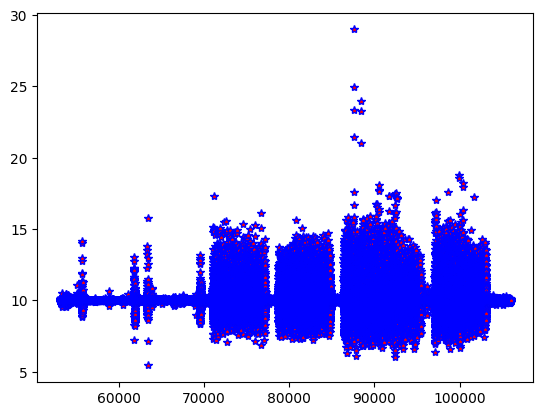

In [38]:
plot_points_and_outliers(right_wrist_data['accelerometer_module'], k=4, title='accelerometer_module')

### K-means

In [39]:
from sklearn.cluster import KMeans
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import minmax_scale

In [54]:
class KMeans:
    # based on the video https://www.youtube.com/watch?v=vtuH4VRq1AU
    def __init__(self, k=3, max_iterations=150):
        self.k = k
        self.max_iterations = max_iterations
        # create clusters - stores indices
        self.clusters = [[] for i in range(self.k)]

    def euclidean_distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2))

    def calculate_clusters(self, data):
        self.data = data.to_numpy()
        self.rows, self.cols = data.shape
        self.distances = np.zeros(self.rows)
        # calculate initial centroids
        random_indexes = np.random.choice(self.rows, self.k, replace=False)
        self.centroids = self.data[random_indexes]
        # update centroids
        for iter in range(self.max_iterations):
            print('Iteration', iter)
            # update clusters
            self.update_clusters()
            # update centroids
            old_centroids = self.centroids.copy()
            self.calculate_new_centroids(self.centroids)
            # check if converged
            if np.array_equal(self.centroids, old_centroids):
                print(f'Ended at iteration {iter}')
                break

    def update_clusters(self):
        clusters = [[] for _ in range(self.k)]
        #self.data.apply(lambda x :  np.sqrt(np.sum((self.data - self.clusters)**2)), axis=1)
        for index, row in enumerate(self.data):
            centroid, distance = self.calculate_closest_centroid(row)
            self.distances[index] = distance
            clusters[centroid] += [index]
        self.clusters = clusters

    def calculate_closest_centroid(self, row):
        distances = np.apply_along_axis(self.euclidean_distance, 1, self.centroids, row)#[self.euclidean_distance(row, centroid) for centroid in self.centroids]
        closest_index = np.argmin(distances)
        return closest_index, distances[closest_index]
    
    def calculate_new_centroids(self, centroids):
        for index, cluster in enumerate(self.clusters):
            cluster_mean = np.mean(self.data[cluster], axis=0)
            centroids[index] = cluster_mean

    # def is_converged(self, new_centroids, old_centroids):
    #     distances = [self.euclidean_distance(new_centroids[index], old_centroids[index]) for index in range(self.k)]
    #     return sum(distances) == 0 # no more changes in the centroids

    def predict(self, data):
        self.calculate_clusters(data)
        self.labels = np.zeros(self.rows)
        for cluster_index, cluster in enumerate(self.clusters):
            for data_index in cluster:
                self.labels[data_index] = cluster_index
        return self.labels
    
    def get_outliers_indexes(self, threshold):
        outliers_indexes = self.distances > threshold # when the distance is greater than threshold, it's an outlier
        return outliers_indexes

In [55]:
kmeans = KMeans(5)

In [46]:
norm_data = normalize_data(right_wrist_features)
type(norm_data)

pandas.core.frame.DataFrame

In [56]:
labels = kmeans.predict(norm_data)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Ended at iteration 36


In [48]:
np.unique(labels, return_counts=True)

(array([0., 1., 2., 3., 4.]),
 array([10812, 18515,  9139, 10691,  3707], dtype=int64))

In [57]:
kmeans.distances.max()

1.1946848852162353

In [ ]:
# from sklearn.cluster import KMeans
# def calculate_kmeans_clusters(dataset, k):
#     # used as reference for the plot: https://www.kaggle.com/code/naren3256/kmeans-clustering-and-cluster-visualization-in-3d/notebook
#     # normalize metrics
#     dataset['accelerometer_module'] = minmax_scale(dataset['accelerometer_module'], feature_range=(0,1))
#     dataset['gyroscope_module'] = minmax_scale(dataset['gyroscope_module'], feature_range=(0,1))
#     dataset['magnetometer_module'] = minmax_scale(dataset['magnetometer_module'], feature_range=(0,1))
#     # normalizar as features para uma melhor analise
#     kmeans = KMeans(k).fit(dataset)
#     return kmeans

In [ ]:
# kmeans2 = calculate_kmeans_clusters(norm_data, 5)

In [58]:
def plot_kmeans_clusters(data, labels):
    data = data.copy()
    data['accelerometer_module'] = minmax_scale(data['accelerometer_module'], feature_range=(0,1))
    data['gyroscope_module'] = minmax_scale(data['gyroscope_module'], feature_range=(0,1))
    data['magnetometer_module'] = minmax_scale(data['magnetometer_module'], feature_range=(0,1))
    scatter = go.Scatter3d( x=data['accelerometer_module'],
                            y=data['gyroscope_module'],
                            z=data['magnetometer_module'],
                            mode='markers',
                            marker=dict(color = labels, size= 2, 
                            line=dict(color= 'black',width = 10))
    )
    layout = go.Layout(scene={  'xaxis' : {'title': 'accelerometer_module'},
                                'yaxis' : {'title' : 'gyroscope_module'},
                                'zaxis' : {'title' : 'magnetometer_module'}       
    }, margin={'l': 0, 'r':0}, height = 800,width = 800)

    

    fig = go.Figure(data=[scatter], layout=layout)
    fig.show()
    """
        for cluster in range(clusters):
        ax.scatter(data[kmeans.labels_ == cluster]['accelerometer_module'],
            data[kmeans.labels_ == cluster]['gyroscope_module'],
            data[kmeans.labels_ == cluster]['magnetometer_module'],
            label=f'cluster {cluster}'
            )

        ax.set_xlabel('accelerometer_module')
        ax.set_ylabel('gyroscope_module')
        ax.set_zlabel('magnetometer_module')
        ax.legend()
        plt.show()
    """
    return labels, kmeans

In [59]:
plot_kmeans_clusters(right_wrist_features, kmeans.labels)

(array([4., 4., 4., ..., 3., 3., 3.]), <__main__.KMeans at 0x24e07ab0670>)

In [52]:
np.unique(labels)

array([0., 1., 2., 3., 4.])